In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas_profiling
import folium
from folium import plugins

In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products = pd.read_csv("order_products.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [3]:
order_products_sample=order_products.sample(frac=0.5, random_state=None,axis=0)
order_products_sample.reset_index(drop=True, inplace=True)
order_products_sample

,order_id,product_id,add_to_cart_order
0,941067,47409,20
1,1953423,13951,15
2,288177,26648,9
3,2828718,19003,12
4,2564978,6991,20
...,...,...,...
16909548,1436962,25640,11
16909549,1898359,36737,2
16909550,2159504,16797,9
16909551,769102,21137,1


In [4]:
count_user=pd.DataFrame()
count_user["user_count"]=orders["user_id"].value_counts()
count_user["user_id"]=orders["user_id"].value_counts().index
count_user.reset_index(drop=True, inplace=True)

In [5]:
count_user

,user_count,user_id
0,100,82420
1,100,154678
2,100,134199
3,100,60040
4,100,143177
...,...,...
206204,4,109381
206205,4,169577
206206,4,167530
206207,4,105283


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='user_count', ylabel='Density'>

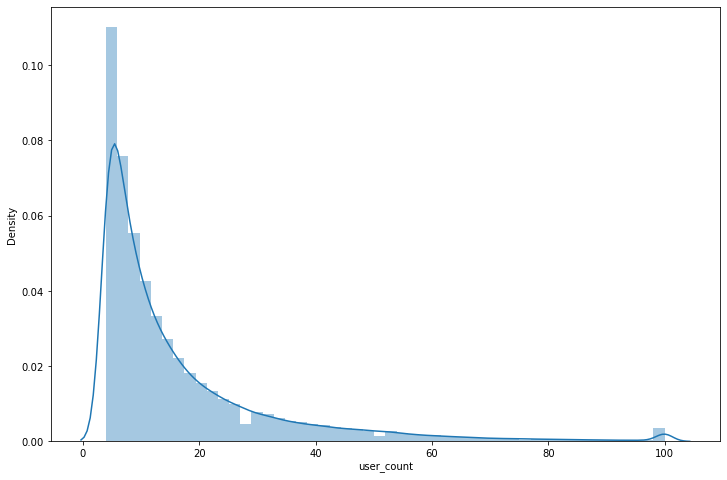

In [6]:
plt.subplots(figsize=(12, 8))
sns.distplot(count_user["user_count"])


In [7]:
df1=pd.merge(order_products_sample, products, how="left", on="product_id")
df1

,order_id,product_id,add_to_cart_order,product_name,aisle_id,department_id
0,941067,47409,20,Original Red Raspberry Yogurt,120,16
1,1953423,13951,15,Mixed Fruit Snacks,50,19
2,288177,26648,9,Ataulfo Mango,24,4
3,2828718,19003,12,Celery,83,4
4,2564978,6991,20,Crunchy Oats 'n Honey Granola,48,14
...,...,...,...,...,...,...
16909548,1436962,25640,11,White Peach,24,4
16909549,1898359,36737,2,Pizza Uncured Pepperoni Gluten Free,79,1
16909550,2159504,16797,9,Strawberries,24,4
16909551,769102,21137,1,Organic Strawberries,24,4


In [8]:
count_department=pd.DataFrame()
count_department["department_count"]=df1["department_id"].value_counts()
count_department["department_id"]=df1["department_id"].value_counts().index
count_department.reset_index(drop=True, inplace=True)

In [9]:
pd.merge(count_department, departments, how="left", on="department_id")

,department_count,department_id,department
0,4945441,4,produce
1,2815699,16,dairy eggs
2,1503463,19,snacks
3,1401467,7,beverages
4,1168450,1,frozen
5,976957,13,pantry
6,612612,3,bakery
7,556978,15,canned goods
8,548025,20,deli
9,452628,9,dry goods pasta


In [10]:
count_aisle=pd.DataFrame()
count_aisle["aisle_count"]=df1["aisle_id"].value_counts()
count_aisle["aisle_id"]=df1["aisle_id"].value_counts().index
count_aisle.reset_index(drop=True, inplace=True)

In [11]:
pd.merge(count_aisle, aisles, how="left", on="aisle_id")

,aisle_count,aisle_id,aisle
0,1898228,24,fresh fruits
1,1783029,83,fresh vegetables
2,923139,123,packaged vegetables fruits
3,753260,120,yogurt
4,510804,21,packaged cheese
...,...,...,...
129,4767,44,eye ear care
130,4399,102,baby bath body care
131,4301,82,baby accessories
132,3258,132,beauty


In [12]:
df2=df1[["order_id","aisle_id","department_id"]].drop_duplicates()
df2

,order_id,aisle_id,department_id
0,941067,120,16
1,1953423,50,19
2,288177,24,4
3,2828718,83,4
4,2564978,48,14
...,...,...,...
16909546,577057,86,16
16909547,408917,112,3
16909549,1898359,79,1
16909550,2159504,24,4


In [13]:
best_aisle= pd.DataFrame()
aa=[]
best_aisle["department_id"]=range(1,22)
best_aisle=pd.merge(best_aisle, departments, how="left", on="department_id")
for i in range(1,22):
    df3=df2[df2["department_id"]==i]
    a=df3["aisle_id"].value_counts().index
    aa.append(a[0])
best_aisle["best_aisle_id"]=aa
best_aisle

,department_id,department,best_aisle_id
0,1,frozen,116
1,2,other,6
2,3,bakery,112
3,4,produce,24
4,5,alcohol,27
5,6,international,66
6,7,beverages,115
7,8,pets,41
8,9,dry goods pasta,131
9,10,bulk,18


In [14]:
df4=df1[["order_id","department_id"]].drop_duplicates()
df4

,order_id,department_id
0,941067,16
1,1953423,19
2,288177,4
3,2828718,4
4,2564978,14
...,...,...
16909536,2852884,16
16909539,1527716,16
16909545,517639,13
16909549,1898359,1


In [15]:
df5=df4[df4["department_id"]==21]
len(df5)

35612

In [16]:
df5=pd.DataFrame()
bb=[]
for i in range(1,22):
    df5=df4[df4["department_id"]==i]
    b=len(df5)
    bb.append(b)
best_aisle["order_num"]=bb
best_aisle

,department_id,department,best_aisle_id,order_num
0,1,frozen,116,799882
1,2,other,6,18735
2,3,bakery,112,524742
3,4,produce,24,2028762
4,5,alcohol,27,55662
5,6,international,66,126349
6,7,beverages,115,975850
7,8,pets,41,37168
8,9,dry goods pasta,131,368832
9,10,bulk,18,17623


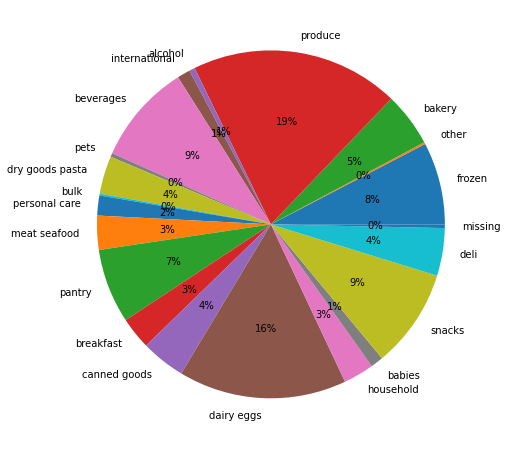

In [17]:
# Data to plot
labels = best_aisle["department"]
sizes = best_aisle["order_num"]

# Plot
plt.figure(figsize=(16,8))
plt.pie(sizes, labels=labels, autopct='%1.0f%%')
plt.show()